In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, accuracy_score

## 1. Загрузка данных (модель на плохих данных)

In [4]:
titanic_df = pd.read_csv('./Data/titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1.1 Фильтрация данных

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1.2 удаление всех пропусков

In [8]:
titanic_df = titanic_df.dropna()
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


### 1.3 Удаление категориальных переменных

In [12]:
category_columns = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
titanic_df = titanic_df.drop(category_columns, axis=1)

### 1.4 Разделение данных на test / train

In [14]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 1.5 Обучение модели Логистической регрессии

In [18]:
log_reg_model = LogisticRegression(max_iter=1000)

In [19]:
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### 1.6 Оценка модели

In [21]:
y_true = y_test
y_predict_proba = log_reg_model.predict_proba(X_test)

In [22]:
fpr, tpr, thresholds = roc_curve(y_true, y_predict_proba[:, 1])

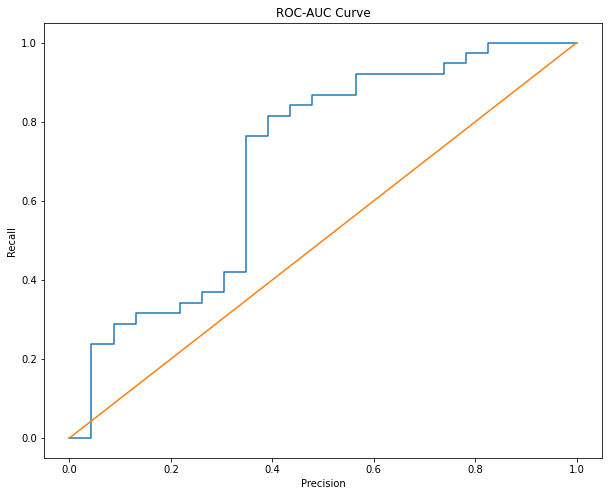

In [29]:
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr)
plt.plot([1, 0], [1, 0])
plt.title('ROC-AUC Curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

 > Вывод по данной модели: по данному графику мы видим, то что модель плоховато справляется с классификацией